In [1]:
import pandas as pd

In [2]:
import dask.dataframe as dd

In [3]:
df = dd.read_csv('data/askizzy/supplydemand/*demand*.csv')

In [4]:
supplydemand = df.compute()

In [5]:
import geopandas as gpd

In [6]:
sa1s = gpd.read_file('shapefiles/1270055001_sa2_2016_aust_shape/SA2_2016_AUST.shp')
sa1s = sa1s.dropna()

In [7]:
from shapely.geometry import Point

In [8]:
def make_points(row):
    row['latlon'] = Point(row['lon'],row['lat'])
    return row

In [9]:
supplydemand = supplydemand.apply(make_points,axis=1)

In [10]:
supply_geo = gpd.GeoDataFrame(supplydemand,geometry='latlon')

In [ ]:
supply_geo.geometry.contains(sa1s.geometry).value_counts()

In [12]:
sa1s

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,STE_NAME16,AREASQKM16,geometry
0,101021007,11007,Braidwood,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,3418.3525,POLYGON ((149.5842329970001 -35.44426999899997...
1,101021008,11008,Karabar,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,6.9825,POLYGON ((149.2189819130001 -35.36739402599994...
2,101021009,11009,Queanbeyan,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,4.7634,POLYGON ((149.2132479820001 -35.34324799199993...
3,101021010,11010,Queanbeyan - East,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,13.0034,"POLYGON ((149.240332114 -35.34782261699996, 14..."
4,101021011,11011,Queanbeyan Region,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,3054.4099,"POLYGON ((149.235800967 -35.38737530299994, 14..."
5,101021012,11012,Queanbeyan West - Jerrabomberra,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,13.6789,POLYGON ((149.1957028700001 -35.36127328299995...
6,101031013,11013,Bombala,10103,Snowy Mountains,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,3989.3618,POLYGON ((148.6800153580001 -36.99266531299997...
7,101031014,11014,Cooma,10103,Snowy Mountains,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,103.6371,"POLYGON ((149.075061245 -36.24048961199998, 14..."
8,101031015,11015,Cooma Region,10103,Snowy Mountains,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,6250.8748,"POLYGON ((148.604372977 -36.13515199999995, 14..."
9,101031016,11016,Jindabyne - Berridale,10103,Snowy Mountains,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,3939.5484,"POLYGON ((148.270329174 -36.46414168099994, 14..."


In [13]:
def return_SA1(row):
    point = row['latlon']
    for sa1 in sa1s.iterrows():
        if point.within(sa1[1]['geometry']):
            row['SA1'] = sa1[1]['SA2_MAIN16']
            row['poly'] = sa1[1]['geometry']
            return row

In [14]:
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)

New pandarallel memory created - Size: 2000 MB
Pandarallel will run on 4 workers


In [15]:
supply_geo = supply_geo.parallel_apply(return_SA1,axis=1)

In [16]:
supply_geo

,State,Suburb,Reason for seeking support,lat,lon,Service Demand,Service Supply,Demand to Supply Ratio,latlon,SA1,poly
0,ACT,ACTON,DISABILITIES|HOUSING|SUPPORT & COUNSELLING,-35.285204,149.112943,38.0,4.0,9.500000,POINT (149.1129432962303 -35.28520392912707),801051049,POLYGON ((149.1104725230001 -35.28427008499995...
1,ACT,AINSLIE,EMPLOYMENT|HOUSING|LAW|SUPPORT & COUNSELLING,-35.262181,149.147923,6.0,6.0,1.000000,POINT (149.1479234803611 -35.26218092762988),801051050,POLYGON ((149.1426052620001 -35.25606801899994...
2,ACT,ARANDA,FAMILY VIOLENCE|HOUSING|LAW,-35.257787,149.078426,1.0,0.0,0.000000,POINT (149.0784264682177 -35.25778651907135),801011001,POLYGON ((149.0740962950001 -35.25529941799994...
3,ACT,BANKS,FAMILY VIOLENCE|HOUSING|LAW,-35.471937,149.099651,19.0,0.0,0.000000,POINT (149.0996514960664 -35.47193657721611),801071071,"POLYGON ((149.090943053 -35.47074525599993, 14..."
4,ACT,BARTON,FAMILY VIOLENCE|HOUSING|LAW,-35.310957,149.131900,2.0,0.0,0.000000,POINT (149.1319001 -35.31095689999999),801061129,"POLYGON ((149.129599984 -35.30890899599996, 14..."
5,ACT,BELCONNEN,DISABILITIES|FAMILY VIOLENCE|HEALTH|HOUSING|LA...,-35.235512,149.067672,31.0,10.0,3.100000,POINT (149.0676724773022 -35.23551189271218),801011002,POLYGON ((149.0569967020001 -35.23909193799994...
6,ACT,BONNER,DISABILITIES|HEALTH|HOUSING|MENTAL HEALTH,-35.155976,149.142966,1.0,0.0,0.000000,POINT (149.1429656925777 -35.15597596244418),801041035,"POLYGON ((149.135112724 -35.15369641899997, 14..."
7,ACT,BONYTHON,HOUSING,-35.425652,149.073467,2.0,0.0,0.000000,POINT (149.0734666329287 -35.42565199934067),801071072,"POLYGON ((149.070947184 -35.42501762199998, 14..."
8,ACT,BRADDON,HOUSING,-35.270824,149.135720,12.0,3.0,4.000000,POINT (149.1357204860276 -35.27082399542206),801051051,POLYGON ((149.1307276870001 -35.27034513499996...
9,ACT,BRUCE,HOUSING,-35.245355,149.091632,18.0,9.0,2.000000,POINT (149.0916319028866 -35.24535537997458),801011003,"POLYGON ((149.073798418 -35.24299874899998, 14..."


In [17]:
supply_out = gpd.GeoDataFrame(supply_geo, geometry='poly')

In [18]:
supply_out.drop('latlon',inplace=True, axis=1)

In [19]:
supply_out = supply_out[supply_out.geometry.isnull() == False]

In [20]:
supply_out = supply_out.fillna(0)

In [21]:
supply_out.geometry = supply_out.geometry.simplify(tolerance=0.001)

In [22]:
supply_out.to_file('supply_sa2.geojson',driver='GeoJSON')

In [138]:
from sklearn.preprocessing import MinMaxScaler

In [139]:
scaler = MinMaxScaler()

In [153]:
scaler.fit_transform(supply_geo['Demand to Supply Ratio'].values.reshape(-1,1))[18]

array([0.02253521])

In [149]:
supply_geo['Demand to Supply Ratio']

0       9.500000
1       1.000000
2       0.000000
3       0.000000
4       0.000000
5       3.100000
6       0.000000
7       0.000000
8       4.000000
9       2.000000
10      0.000000
11      0.000000
12      0.000000
13      0.000000
14      0.000000
15      0.000000
16      0.000000
17     83.927273
18     24.000000
19      0.000000
20      0.000000
21      6.500000
22      7.727273
23      3.000000
24     13.250000
25      1.000000
26      0.000000
27      0.000000
28      0.000000
29      0.000000
         ...    
427     0.416667
428     0.000000
429     0.000000
430     0.000000
431     0.000000
432     0.000000
433     0.000000
434     1.000000
435     0.000000
436     0.000000
437     0.000000
438     0.000000
439     0.000000
440     0.000000
441     0.000000
442    14.000000
443     0.000000
444     0.000000
445     0.000000
446     0.000000
447     0.000000
448     0.000000
449     0.000000
450     0.000000
451    30.000000
452     0.000000
453     0.000000
454     0.0000

In [202]:
supply_geo

,State,Suburb,Reason for seeking support,lat,lon,Service Demand,Service Supply,Demand to Supply Ratio,latlon,SA1,poly
0,ACT,ACTON,DISABILITIES|HOUSING|SUPPORT & COUNSELLING,-35.285204,149.112943,38.0,4.0,9.500000,POINT (149.1129432962303 -35.28520392912707),80105104901,POLYGON ((149.1104725230001 -35.28427008499995...
1,ACT,AINSLIE,EMPLOYMENT|HOUSING|LAW|SUPPORT & COUNSELLING,-35.262181,149.147923,6.0,6.0,1.000000,POINT (149.1479234803611 -35.26218092762988),80105105011,"POLYGON ((149.148271084 -35.25792399499994, 14..."
2,ACT,ARANDA,FAMILY VIOLENCE|HOUSING|LAW,-35.257787,149.078426,1.0,0.0,0.000000,POINT (149.0784264682177 -35.25778651907135),80101100106,POLYGON ((149.0769180000001 -35.25912999099995...
3,ACT,BANKS,FAMILY VIOLENCE|HOUSING|LAW,-35.471937,149.099651,19.0,0.0,0.000000,POINT (149.0996514960664 -35.47193657721611),80107107106,"POLYGON ((149.097471151 -35.47104902699994, 14..."
4,ACT,BARTON,FAMILY VIOLENCE|HOUSING|LAW,-35.310957,149.131900,2.0,0.0,0.000000,POINT (149.1319001 -35.31095689999999),80106112901,POLYGON ((149.1318832410001 -35.31262814299998...
5,ACT,BELCONNEN,DISABILITIES|FAMILY VIOLENCE|HEALTH|HOUSING|LA...,-35.235512,149.067672,31.0,10.0,3.100000,POINT (149.0676724773022 -35.23551189271218),80101100205,POLYGON ((149.0611388310001 -35.22845699099997...
6,ACT,BONNER,DISABILITIES|HEALTH|HOUSING|MENTAL HEALTH,-35.155976,149.142966,1.0,0.0,0.000000,POINT (149.1429656925777 -35.15597596244418),80104103510,POLYGON ((149.1433150040001 -35.15710199099993...
7,ACT,BONYTHON,HOUSING,-35.425652,149.073467,2.0,0.0,0.000000,POINT (149.0734666329287 -35.42565199934067),80107107206,"POLYGON ((149.073781884 -35.42653499299996, 14..."
8,ACT,BRADDON,HOUSING,-35.270824,149.135720,12.0,3.0,4.000000,POINT (149.1357204860276 -35.27082399542206),80105105117,POLYGON ((149.1351141110001 -35.26718361499996...
9,ACT,BRUCE,HOUSING,-35.245355,149.091632,18.0,9.0,2.000000,POINT (149.0916319028866 -35.24535537997458),80101100320,POLYGON ((149.0928749970001 -35.24576599799997...


In [208]:
state_ratio = supply_geo.groupby('State')['Demand to Supply Ratio'].mean()

<IPython.core.display.Javascript object>


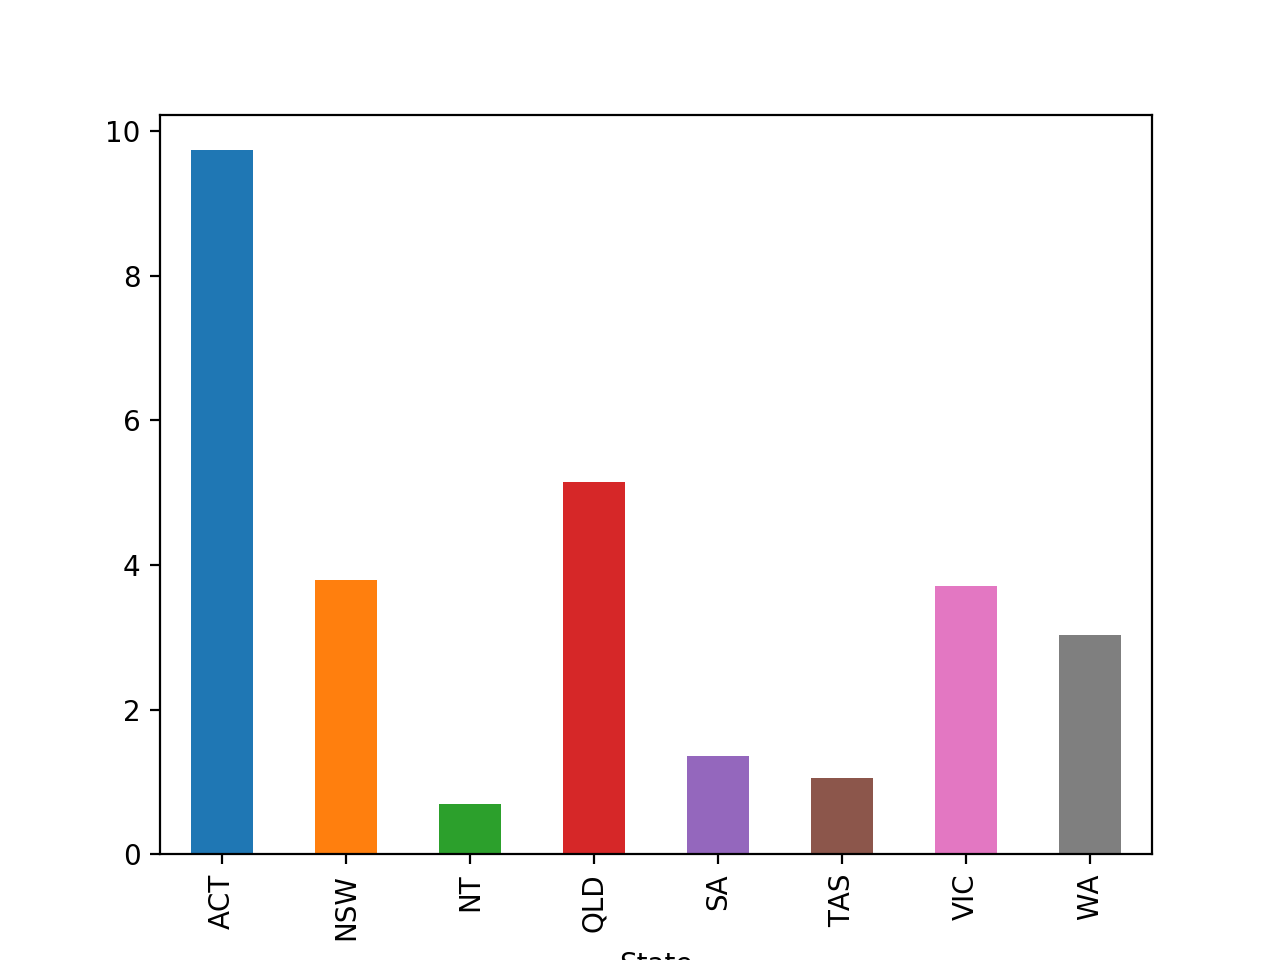

In [210]:
state_ratio.plot(kind='bar',style=['xkcd'])

In [205]:
%matplotlib notebook

In [215]:
supply_geo[supply_geo['Demand to Supply Ratio'] > 0]['Demand to Supply Ratio'].mean()

9.062043472257718